In [61]:
import numpy as np 
import matplotlib.pyplot as plt
from data_processing import *
from report_processing import *
import warnings
warnings.filterwarnings("ignore")

In [62]:
filename="PS\\746-R-中.csv"
ring_choice="中圈"

In [63]:
data = read_data(filename)
point_per_mm=data.shape[0]/17 # 17mm
mm_per_point=1/point_per_mm

if ring_choice == '内圈':
        image_center=(17/2*point_per_mm,17/2*point_per_mm)
        ring_num=4
elif ring_choice == '中圈':
        image_center=((17/2+11)*point_per_mm,17/2*point_per_mm)
        ring_num=14
elif ring_choice == '外圈':
        image_center=((17/2+16)*point_per_mm,17/2*point_per_mm)
        ring_num=14
else:
        pass 
ring_num=4

minRadius=(0.8*point_per_mm/2)
maxRadius=(1.5*point_per_mm/2)  
min_area=3.14*minRadius**2/4
max_area=3.14*maxRadius**2/4   
# print(minRadius,maxRadius) 
# print(min_area,max_area)  

binary_image = detect_edge(data,threshold=1.0)
microlenses, microlens_only_image = label_microlens(
binary_image,
min_area=15*15,
)
microlens_params=microlens_centers_radius(microlenses)
sorted_microlens_params=cluster_rings(
        microlens_params,
        image_center=image_center,
        ring_num=ring_num,
        max_ring = ring_num+2,
        threshold=10)

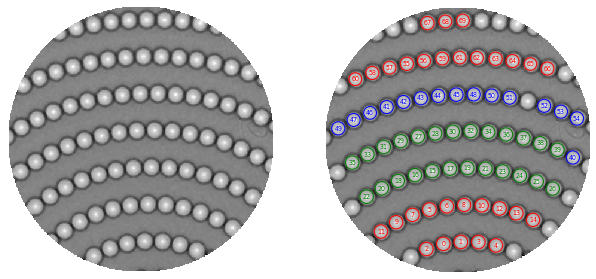

In [64]:
whole_pic_filename=f"{filename.split('.')[0]}_whole.png"
report_whole_picture(sorted_microlens_params, data,whole_pic_filename,dpi=75),
plt.show()

In [65]:
ring_number_list_list=[
    range(6,14)
    # range(0,7+1),
    # range(8,19+1),
    # range(20,33+1),
    # range(34,47+1),
    # range(48,60+1),
    # range(61,71+1),
   
]


In [66]:
for ring_number_list in ring_number_list_list:
    mean_list=[]
    std_list=[]

    diameter_list=[0.7,0.5,0.3,0.1]
    for d in diameter_list:
        power_list=[]
        maxpower_list=[]
        for i in ring_number_list:
            measure_radius=d/2*point_per_mm
            power=measure_one_microlens_center_area(i,sorted_microlens_params,data,radius=measure_radius)

            max_power=measure_one_microlens_max(i,sorted_microlens_params,data,radius=measure_radius)

            power_list.append(power)
            maxpower_list.append(max_power)
            # fig.show()

        mean_power=np.mean(power_list)
        std_power=np.std(power_list)
        max_power_mean=np.mean(maxpower_list)
        max_power_std=np.std(maxpower_list)

        mean_list.append(mean_power)
        std_list.append(std_power)
        print(f"{d}, {mean_power:.3f}, {std_power:.3f}") 
    print(f"0.0, {max_power_mean:.3f}, {max_power_std:.3f}")
    print()

0.7, 3.056, 0.048
0.5, 4.024, 0.054
0.3, 5.369, 0.083
0.1, 6.978, 0.142
0.0, 7.161, 0.198

